In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
pd.set_option('display.max_rows', None)

## Data Wrangling

In [4]:
df = pd.read_csv("data/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
# drop features that are not needed to build models
df_1 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df_1.shape

(13320, 5)

In [8]:
df_1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df_1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df_2 = df_1.dropna(axis=0)
df_2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df_2.shape

(13246, 5)

In [12]:
df_2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df_2['bhk'] = df_2['size'].apply(lambda x: int(x.split(" ")[0]))

/tmp/ipykernel_41820/3251464671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['bhk'] = df_2['size'].apply(lambda x: int(x.split(" ")[0]))


In [14]:
df_2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df_2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df_2[df_2.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df_2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
	try:
		float(x)
	except:
		return False
	return True


In [19]:
df_2[~df_2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_to_num(x):
	tokens = x.split('-')
	if len(tokens) == 2:
		return (float(tokens[0]) + float(tokens[1]))/2
	try:
		return float(x)
	except:
		return None

In [21]:
df_3 = df_2.copy()
df_3['total_sqft'] = df_3['total_sqft'].apply(convert_to_num)

In [22]:
df_3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Feature Engineering

In [23]:
df_5 = df_3.copy()
df_5['price_per_sqft'] = df_5['price']*100000/df_5['total_sqft']
df_5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
df_5.location.nunique()

1304

In [25]:
# Remove starting and trailing empty spaces to remove inconsistencies
df_5.location = df_5.location.apply(lambda x: x.strip())

In [26]:
location_stats = df_5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [27]:
threshold = 10
len(location_stats[location_stats <= 10])

1052

In [28]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Basapura                                              10
1st Block Koramangala                                 10
Gunjur Palya                                          10
Kalkere                                               10
Sector 1 HSR Layout                                   10
Dairy Circle                                          10
Naganathapura                                         10
Sadashiva Nagar                                       10
Nagadevanahalli                                       10
BTM 1st Stage                                         10
Nagappa Reddy Layout                                  10
Dodsworth Layout                                      10
Ganga Nagar                                           10
2nd Phase JP Nagar                                     9
Volagerekallahalli                                     9
Yemlur                                                 9
4th Block Koramangala                                  9
Lingarajapuram        

In [29]:
len(df_5.location.unique())

1293

In [30]:
# Change the rest of the locations to 'other' category
df_5.location = df_5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df_5.location.nunique()

242

### Outlier Detection and Removal

In [31]:
# Remove outliers that have unreasonable total area for the number of rooms given
df_5[df_5.total_sqft/df_5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df_5.shape

(13246, 7)

In [33]:
df_6 = df_5[~(df_5.total_sqft/df_5.bhk<300)]
df_6.shape

(12502, 7)

In [34]:
# Remove extreme cases for price_per_sqft
df_6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
# Find mean and standard deviation of the price_per_shift per location and remove the outliers
def remove_pps_outlier(df):
	df_out = pd.DataFrame()
	for key, sub_df in df.groupby('location'):
		m = np.mean(sub_df.price_per_sqft)
		st = np.std(sub_df.price_per_sqft)
		reduced_df = sub_df[(sub_df.price_per_sqft>(m-st)) & (sub_df.price_per_sqft <= (m+st))]
		df_out = pd.concat([df_out, reduced_df], ignore_index=True)
	return df_out

In [36]:
df_7 = remove_pps_outlier(df_6)
df_7.shape

(10241, 7)

In [37]:
# Scatter plot to visualize total_sqft versus price

def plot_scatter_chart(df, location):
	bhk2 = df[(df.location == location) & (df.bhk == 2)]
	bhk3 = df[(df.location == location) & (df.bhk == 3)]
	matplotlib.rcParams['figure.figsize'] = (10, 6)
	plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
	plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color='green', label='3 BHK', s=50)
	plt.xlabel("Area (square foot)")
	plt.ylabel("Price")
	plt.legend()

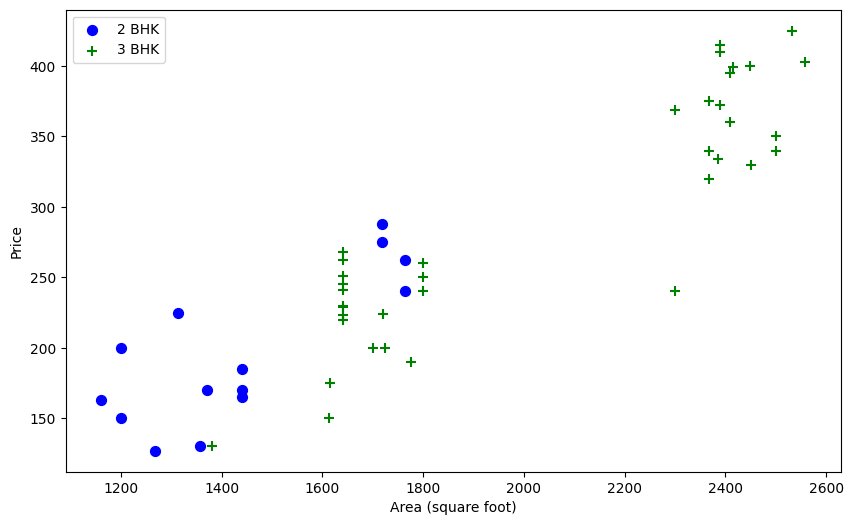

In [38]:
plot_scatter_chart(df_7, "Rajaji Nagar")

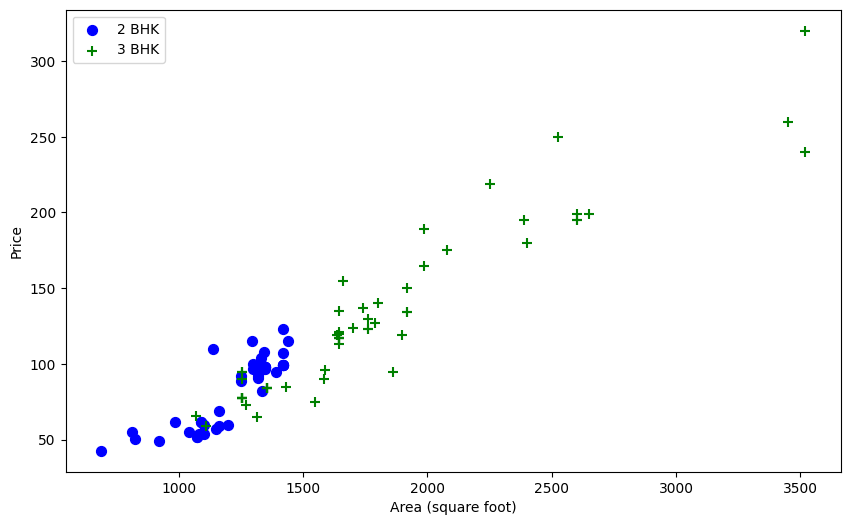

In [39]:
plot_scatter_chart(df_7, "Hebbal")

**Clean up the outliers**

We should remove properties where for same location, the price of 3 bedroom apartment is less than 2 bedroom apartment(with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

```
{
	'1': {
		'mean': 4000,
		'std': 2000,
		'count': 34
	},
	'2': {
		'mean': 4300,
		'std': 2300,
		'count': 22
	},
}
```
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [40]:
def remove_bhk_outliers(df):
	exclude_indices = np.array([])
	for location, location_df in df.groupby('location'):
		bhk_stats = {}
		for bhk, bhk_df in location_df.groupby('bhk'):
			bhk_stats[bhk] = {
				'mean' : np.mean(bhk_df.price_per_sqft),
				'std' : np.std(bhk_df.price_per_sqft),
				'count': bhk_df.shape[0]
			}
		# go through the location_df and find the indices of records that are outliers
		for bhk, bhk_df in location_df.groupby('bhk'):
			stats = bhk_stats.get(bhk-1)
			if stats and stats['count']>5:
				exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
	return df.drop(exclude_indices, axis='index')

In [41]:
df_8 = remove_bhk_outliers(df_7)

In [42]:
df_8.shape

(7329, 7)

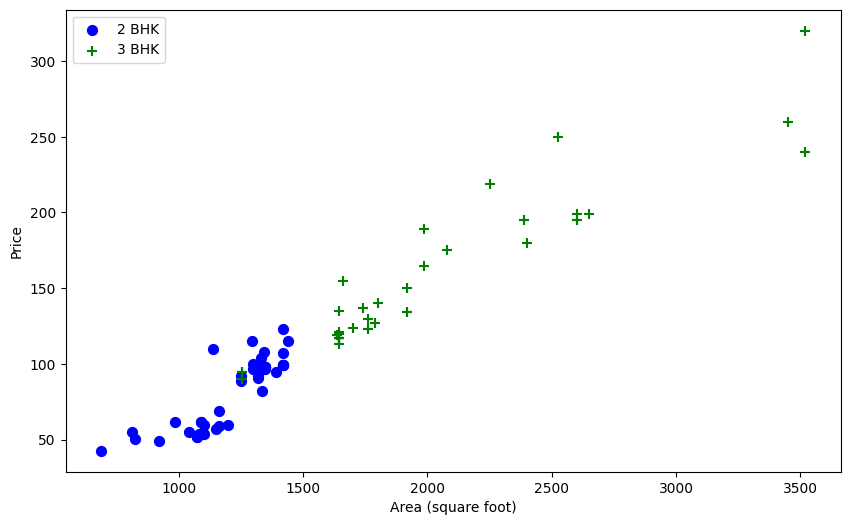

In [43]:
# Plot same scatter plot as before to check for the improvement
plot_scatter_chart(df_8, "Hebbal")

Text(0, 0.5, 'Count')

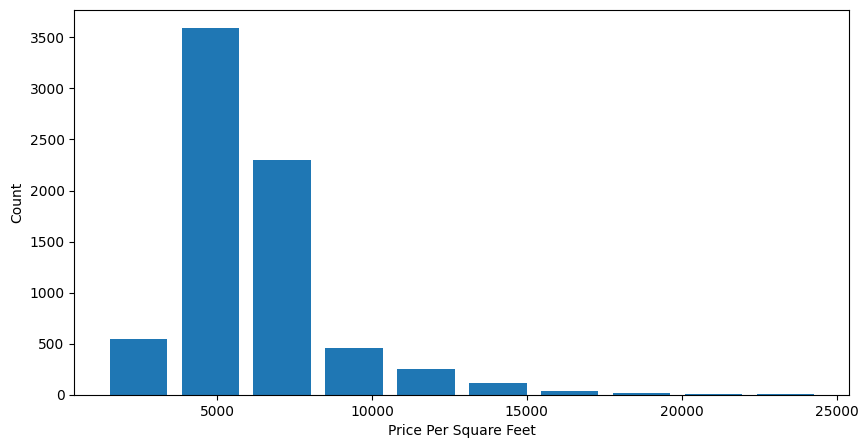

In [44]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.hist(df_8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel("Count")

In [45]:
# Explore the bathroom property
df_8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [46]:
df_8[df_8.bath >  10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

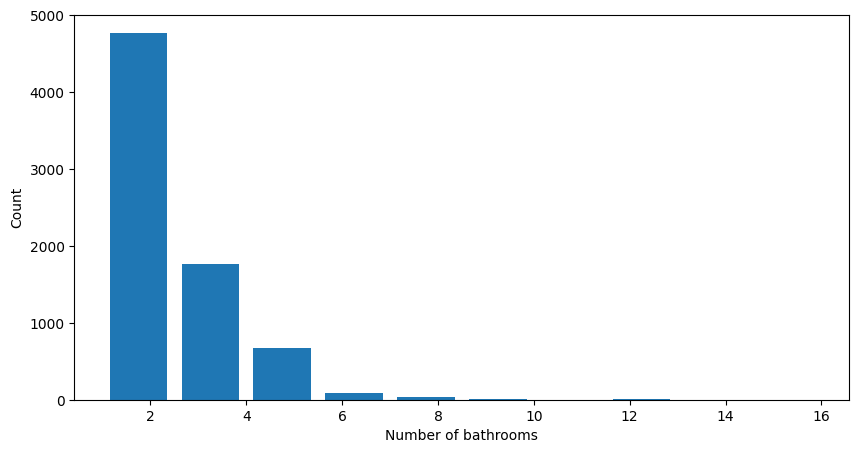

In [47]:
## Remove all records where bath > bhk + 2
plt.hist(df_8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [48]:
df_8[df_8.bath > df_8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [49]:
df_9 = df_8[df_8.bath < df_8.bhk+2]
df_9.shape

(7251, 7)

In [50]:
# Drop unnessary features
df_9 = df_9.drop(['size', 'price_per_sqft'], axis='columns')

In [51]:
df_9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [53]:
df_9.to_csv("./data/clean_data.csv", index=None)